# Análise de Preço de Casas

> Este notebook aborda a modelagem do preço de venda de casas.

## Informações do Aluno

* **Nome:** Igor Lima Rocha
* **Matrícula:** 201910282
* **E-mail:** ilrocha.cic@uesc.br

## 1. Introdução

Neste documento, apresento os passos e as técnicas utilizadas para encontrar o melhor modelo de previsão de preços de casas. O objetivo principal deste trabalho é aplicar técnicas de pré-processamento de dados, seleção de características, ajuste de hiperparâmetros e métodos de regressão para criar um modelo preciso.

O conjunto de dados utilizado nesta análise é proveniente da competição ["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) no Kaggle, que oferece um conjunto desafiador de dados relacionados aos preços de venda de casas. Vamos **explorar e manipular** esses dados de forma a extrair informações valiosas que nos permitam construir um modelo de previsão confiável.

A avaliação do modelo será feita utilizando a métrica de erro **Root-Mean-Squared-Error (RMSE)** entre o logaritmo dos valores preditos e o logaritmo dos valores reais. Este relatório descreverá em detalhes cada etapa do processo, desde a **análise exploratória dos dados até a seleção de características, modelagem e avaliação final do modelo**.

Espero que este relatório seja informativo e forneça insights sobre o processo de construção de um modelo de previsão de preços de casas. Vamos começar explorando os dados e aplicando as técnicas necessárias para alcançar nosso objetivo.

## 2. Carregamento dos Dados

Agora, vamos carregar o conjunto de dados em um DataFrame para começar nossa análise.

In [1]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('houses.csv')

# Salvando o dataset original como backup, para avaliações futuras
df_original = df.copy()

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Com o DataFrame carregado, podemos prosseguir para as próximas etapas.

## 3. Checagem dos Tipos de Dados

É crucial conhecer os tipos de dados com os quais estamos trabalhando. Vamos dar uma olhada.

In [2]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Com isso, podemos ver que o conjunto de dados contém diversos tipos de dados.

Com isso em mente, vamos começar a tratá-los, removendo valores ausentes e codificando tipos categóricos.

## 4. Limpeza dos Dados

### 4.1 Tratamento de Valores Ausentes

A primeira etapa da limpeza de dados envolve o tratamento de valores ausentes.

In [3]:
# Criar uma cópia do dataframe para não alterar o original
df_cleaned = df.copy()

# Calcule a proporção de valores ausentes em cada coluna
missing_ratio = df_cleaned.isnull().mean()

# Limite para a proporção de valores ausentes (50%)
threshold = 0.5

# Identifique as colunas que excedem o limite
columns_to_remove = missing_ratio[missing_ratio > threshold].index.tolist()

print("Colunas com muitos NaN:", columns_to_remove)

# Remova as colunas identificadas do seu conjunto de dados
#df_cleaned = df_cleaned.drop(columns=columns_to_remove)

Colunas com muitos NaN: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [4]:
import numpy as np

# Tratar colunas numéricas: preencher valores ausentes com a mediana da coluna
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Tratar colunas categóricas: preencher valores ausentes com a moda (valor mais frequente)
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


Agora que tratamos os valores ausentes, podemos seguir para a próxima etapa.

### 4.2 Codificação de Variáveis Categóricas

A próxima etapa é transformar variáveis categóricas em um formato que possa ser fornecido aos algoritmos de ML para fazer uma previsão precisa.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o codificador
le = LabelEncoder()

# Codificar todas as colunas categóricas
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000


As variáveis categóricas foram codificadas com sucesso. Agora, estamos prontos para prosseguir para as próximas etapas.

## 5. Escalonamento e Normalização

Agora, vamos escalar e normalizar as variáveis numéricas. O escalonamento é importante porque muitos algoritmos de machine learning são sensíveis à magnitude das variáveis.

In [6]:
from sklearn.preprocessing import StandardScaler

# Inicializar o escalonador
scaler = StandardScaler()

# Escalonar todas as colunas numéricas
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    df_cleaned[col] = scaler.fit_transform(df_cleaned[[col]])

df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,-0.220875,-0.207142,0.064238,-0.169981,0.750731,0.314667,-0.02618,...,-0.068692,0.049718,0.250362,0.039485,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,0.460320,-0.091886,0.064238,-0.169981,0.750731,0.314667,-0.02618,...,-0.068692,0.049718,0.250362,0.039485,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,-0.084636,0.073480,0.064238,-0.169981,-1.378933,0.314667,-0.02618,...,-0.068692,0.049718,0.250362,0.039485,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,-0.447940,-0.096897,0.064238,-0.169981,-1.378933,0.314667,-0.02618,...,-0.068692,0.049718,0.250362,0.039485,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.641972,0.375148,0.064238,-0.169981,-1.378933,0.314667,-0.02618,...,-0.068692,0.049718,0.250362,0.039485,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843


As variáveis numéricas foram escalonadas com sucesso. Isso nos prepara para a etapa de seleção de características e modelagem.


## 6. Tratamento de Outliers

Antes de prosseguir para a modelagem, vamos tratar os outliers das características selecionadas.

Isso é crucial, pois outliers podem afetar adversamente o desempenho de nosso modelo.

In [7]:
def filter_by_col(data, col):
    limit = 1.8
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir limites para os outliers
    lower_bound = Q1 - limit * IQR
    upper_bound = Q3 + limit * IQR

    # Remover outliers
    data_filtered = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

    return data_filtered

In [8]:
for feature in df_cleaned.columns:
    df_cleaned = filter_by_col(df_cleaned, feature)

# Atualizar X e y após a remoção dos outliers
X_final = df_cleaned[list(df_cleaned.columns)]
y = df_cleaned['SalePrice']

## 7. Seleção de Características

Nesta etapa, vamos aplicar diversos métodos para selecionar as características mais relevantes para o modelo.

### 7.1 Método 1: Variance Threshold

O método Variance Threshold é usado para selecionar características com **alta variância nos dados**.

Em outras palavras, ele ajuda a identificar as características que têm uma **variabilidade significativa** em seus valores.

Essa técnica é útil quando desejamos remover características com baixa variância, pois elas geralmente não contribuem muito para a modelagem, uma vez que seus valores não mudam muito entre as amostras.

A ideia é manter apenas as características que têm uma variabilidade suficiente para influenciar as previsões do modelo.

In [9]:
from sklearn.feature_selection import VarianceThreshold

# Separar variáveis independentes e dependentes
X = df_cleaned.drop('SalePrice', axis=1)
y = df_cleaned['SalePrice']

# Inicializar o seletor de variância
selector = VarianceThreshold()

# Ajustar o seletor aos dados
selector.fit(X)

# Obter as características com variância acima do limiar
high_variance_features = X.columns[selector.get_support()]

high_variance_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold'],
      dtype='object')

### 7.2 Método 2: Pearson's Correlation Coefficient

O Coeficiente de Correlação de Pearson é uma medida estatística que avalia a **relação linear entre duas variáveis contínuas**.

Neste contexto, ele é usado para avaliar a relação linear entre cada característica e a variável alvo (preço das casas). Um valor próximo de 1 indica uma **correlação positiva forte**, enquanto um valor próximo de -1 indica uma **correlação negativa forte**. Valores próximos de 0 indicam **baixa correlação**.

Selecionamos as características que têm uma correlação positiva forte com o preço das casas, pois elas têm maior probabilidade de contribuir para as previsões precisas do modelo.

In [10]:
# Calcular a correlação de Pearson das características com a variável alvo
correlation_matrix = df_cleaned.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Selecionar as características altamente correlacionadas
high_corr_features = correlation_with_target[correlation_with_target > 0.5].index

high_corr_features

Index(['SalePrice', 'GrLivArea', 'OverallQual'], dtype='object')

### 7.3 Método 3: Mutual Information

A Informação Mútua é uma medida de quanto uma característica fornece **informações sobre a variável alvo**.

Em outras palavras, ela mede a **dependência estatística** entre uma característica e a variável alvo. Quanto maior a informação mútua entre uma característica e a variável alvo, mais valiosa é essa característica para o modelo.

Este método ajuda a identificar as características que têm uma **relação forte e não linear** com o preço das casas, capturando **informações que podem ser perdidas pelo Coeficiente de Correlação de Pearson**.

In [11]:
from sklearn.feature_selection import mutual_info_regression

# Calcular a informação mútua
mutual_info = mutual_info_regression(X, y)

# Criar um DataFrame para as pontuações
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mutual_info})

# Selecionar as características com maior informação mútua
high_mutual_info_features = mutual_info_df.sort_values('Mutual_Info', ascending=False).head(10)['Feature']

high_mutual_info_features

46       GrLivArea
0               Id
38     TotalBsmtSF
17     OverallQual
33    BsmtFinType1
62      GarageArea
43        1stFlrSF
53     KitchenQual
34      BsmtFinSF1
37       BsmtUnfSF
Name: Feature, dtype: object

## 8. Decisão sobre as Características a Serem Utilizadas

Depois de aplicar diferentes métodos para a seleção de características, é hora de decidir quais delas vamos realmente utilizar para treinar nosso modelo de machine learning.

Optamos por usar a "Intersecção" das características selecionadas pelos métodos de Variance Threshold, Pearson's Correlation Coefficient e Mutual Information.


In [12]:
# Encontrar a intersecção das características selecionadas pelos três métodos

final_features = set(high_variance_features) & set(high_corr_features) & set(high_mutual_info_features)

final_features

{'GrLivArea', 'OverallQual'}

As características armazenadas na variável `final_features` são aquelas que foram consideradas importantes pela intersecção dos três métodos. Essas serão as características que vamos usar para treinar nosso modelo final.

## 9. Análise de dados

Para entender o **impacto dos outliers e da normalização** em nosso conjunto de dados, vamos visualizar os **boxplots** das características selecionadas **antes e depois dessas etapas**.

Os boxplots nos ajudarão a entender a **distribuição dos dados** e a **presença de outliers**.

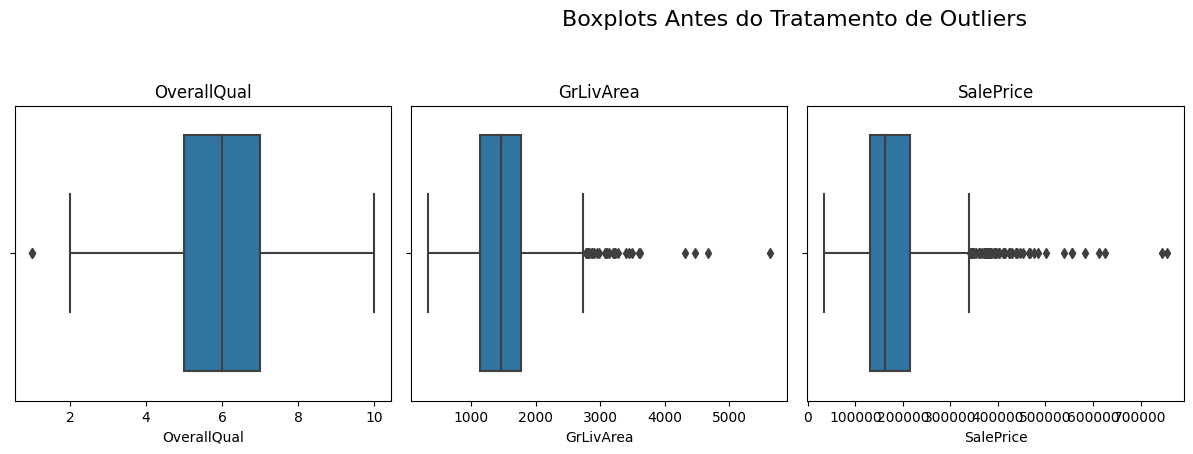

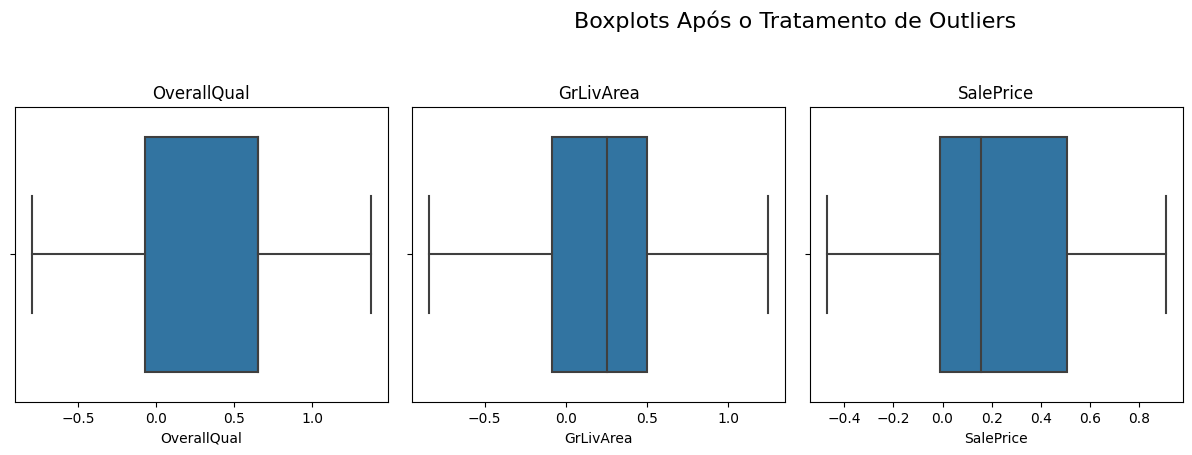

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar apenas as colunas em 'final_features' e 'SalePrice' para plotar
cols_to_plot = list(final_features) + ['SalePrice']
df_original_filtered = df_original[cols_to_plot]
df_cleaned_filtered = df_cleaned[cols_to_plot]

# Plotar gráficos de caixa antes do tratamento de outliers
plt.figure(figsize=(16, 8))
plt.suptitle('Boxplots Antes do Tratamento de Outliers', fontsize=16)
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df_original_filtered[col])
    plt.title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotar gráficos de caixa após o tratamento de outliers
plt.figure(figsize=(16, 8))
plt.suptitle('Boxplots Após o Tratamento de Outliers', fontsize=16)
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df_cleaned_filtered[col])
    plt.title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### • Observações

Comparando os boxplots **antes e depois do tratamento de outliers e da normalização**, podemos observar **significativas mudanças na distribuição e escala dos dados**.

Os **outliers**, representados pelos pontos fora das "caixas", são **visivelmente reduzidos** após o tratamento. Além disso, a **escala dos dados também é alterada devido à normalização**.

Essas transformações tornam a distribuição **mais concentrada** e, portanto, **mais informativa para a modelagem**. Isso nos prepara para a **próxima etapa, que é a modelagem do algoritmo de machine learning**.


## 10. Modelagem

**Nesta etapa, nosso objetivo é encontrar o modelo que melhor prediz o preço de venda das casas.** Vamos começar experimentando um modelo simples, a Regressão Linear, e então exploraremos modelos mais complexos.

### 10.1 Regressão Linear

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import math

# Separar o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

Antes de aplicar o criterio de avaliação, precisamos levar em consideração uma coisa.

Como ele aplica a raiz em certos numeros, esses numeros não podem ser negativos.

Porém como podemos ver abaixo, existem valores negativos previstos:

In [15]:
# Verificar se há valores negativos em y_test
print("Valores negativos em y_test:", (y_test < 0).sum())

Valores negativos em y_test: 1


Então para limpar esses valores, podemos definir eles como um número bem próximo de zero.

In [16]:
# Substituir valores negativos por um pequeno valor positivo em y_test e y_pred
y_test = np.maximum(y_test, 1e-10)
y_pred = np.maximum(y_pred, 1e-10)

Agora sim podemos seguir para a avaliação

### 10.2 Avaliação

O critério de avaliação será o **Root-Mean-Squared-Error (RMSE)** entre o logaritmo do valor predito e o logaritmo do valor real, conforme especificado na atividade.

In [17]:
from sklearn.metrics import mean_squared_error

# Calcular o RMSE aplicando logaritmo e usando squared=False
rmse_log = mean_squared_error(np.log(y_test), np.log(y_pred), squared=False)

# Exibir o RMSE
print(f"O RMSE do modelo de Regressão Linear é: {rmse_log}")

O RMSE do modelo de Regressão Linear é: 0.1538853546900921


## 11. Avaliação do modelo

Após treinar nosso modelo de Regressão Linear, nós o avaliamos usando a métrica Root Mean Squared Error (RMSE). O RMSE é uma métrica de desempenho popular para modelos de regressão e dá uma ideia da magnitude dos erros cometidos pelo modelo. No nosso caso, o RMSE obtido foi de aproximadamente `0.15`

- O que isso significa?

O RMSE nos dá uma ideia de quão bem nosso modelo é capaz de prever o preço das casas, com um erro médio de `0.15` na escala logarítmica.

Vale lembrar que, neste caso, estamos usando o RMSE entre o logaritmo do valor predito e o logaritmo do valor real, conforme solicitado no enunciado da atividade.

### 11.1 Gráfico

Para fornecer uma representação gráfica do desempenho do nosso modelo, optamos por criar um gráfico em linha que compara os valores reais e previstos dos preços das casas.

Embora os preços das casas neste conjunto de dados não sejam intrinsecamente ordenados (como seria o caso em uma série temporal), ordenamos ambos os conjuntos de preços com base nos valores reais para facilitar a comparação visual.

In [18]:
# Converter para arrays NumPy para facilitar a manipulação
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Ordenar y_test e obter os índices ordenados
sorted_indices = np.argsort(y_test_array)

# Usar os índices ordenados para ordenar y_test e y_pred
sorted_y_test = y_test_array[sorted_indices]
sorted_y_pred = y_pred_array[sorted_indices]

Em seguida, plotamos os valores ordenados em um gráfico de linha.

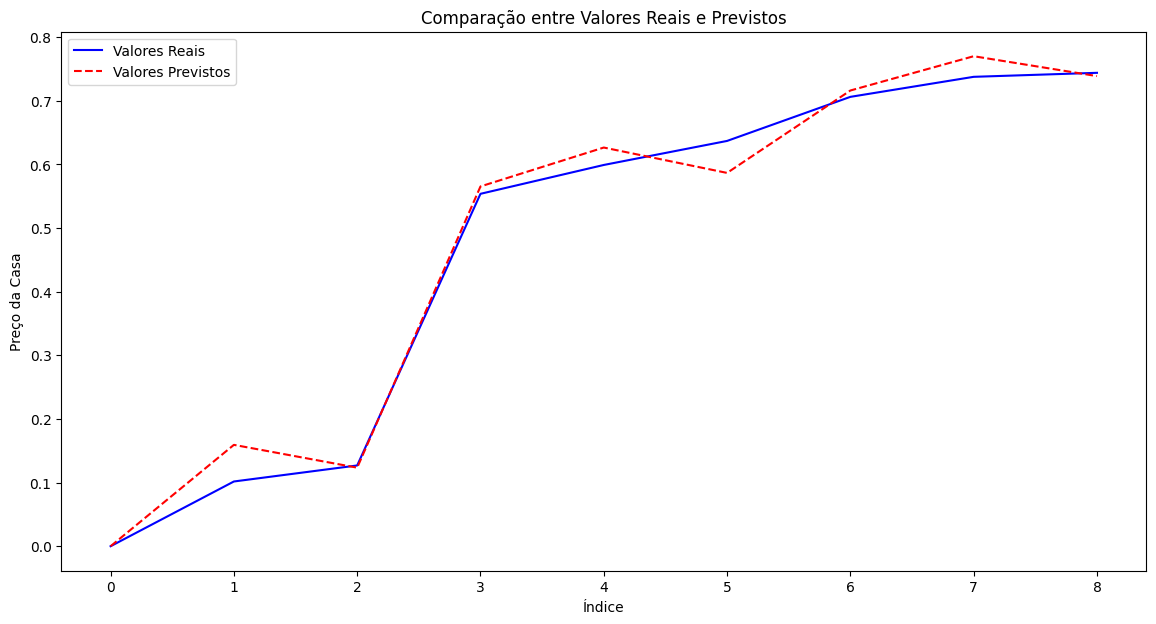

In [19]:
plt.figure(figsize=(14, 7))

# Plotar valores reais
plt.plot(sorted_y_test, label='Valores Reais', color='blue')

# Plotar valores previstos com uma linha pontilhada vermelha
plt.plot(sorted_y_pred, label='Valores Previstos', color='red', linestyle='--')

plt.xlabel('Índice')
plt.ylabel('Preço da Casa')
plt.title('Comparação entre Valores Reais e Previstos')
plt.legend()
plt.show()